In [14]:
# Data exploration and preprocessing
import pandas as pd
import numpy as np

data = pd.read_csv('diabetes.csv')

features = data.columns

features



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
# Changing outcome to the type binary, do to it being yes or no 
data['Outcome'] = data["Outcome"].astype('bool')
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                        bool
dtype: object

In [17]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


In [19]:
# Print above values in a table
print("Central Tendency")
print(data.median())
print("\n")
print("Variance")
print(data.var())
print("\n")
print("Standard Deviation")
print(data.std())
print("\n")
print("Mean")
print(data.mean())
print("\n")
print("Mode")
print(data.mode())
print("\n")
print("Second Mode")
print(data.mode().iloc[1])
print("\n")
print("Minimum")
print(data.min())
print("\n")
print("Maximum")
print(data.max())
print("\n")
print("Range")
print(data.drop(columns=['Outcome']).max() - data.drop(columns=['Outcome']).min())
print("\n")

# data.describe()

Central Tendency
Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


Variance
Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64


Standard Deviation
Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                     

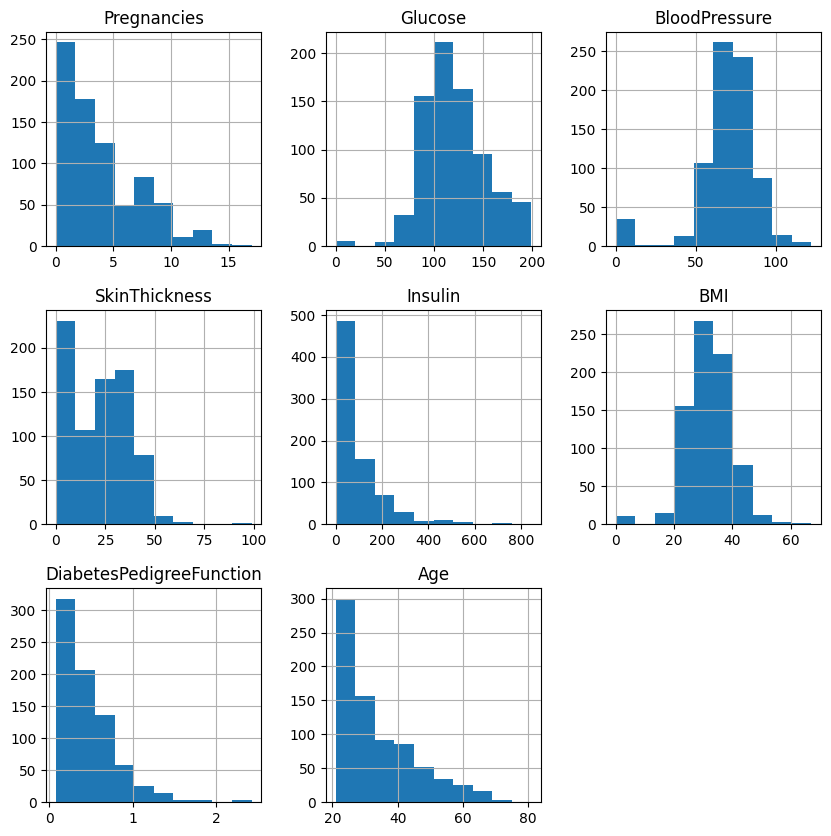

In [20]:
# Histograms for each feature
import matplotlib.pyplot as plt
data.hist(figsize=(10, 10))
plt.show()


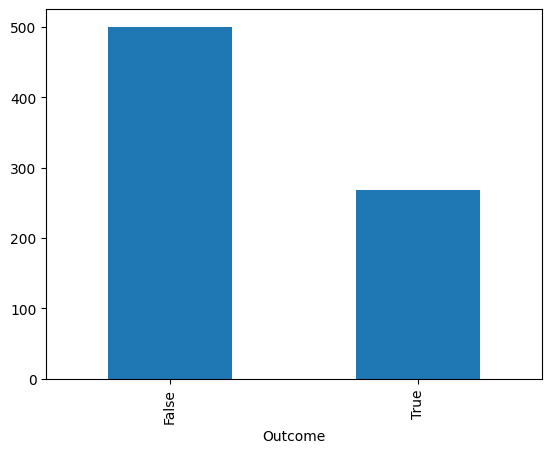

In [21]:
# barplot for outcome
data['Outcome'].value_counts().plot(kind='bar')
plt.show()

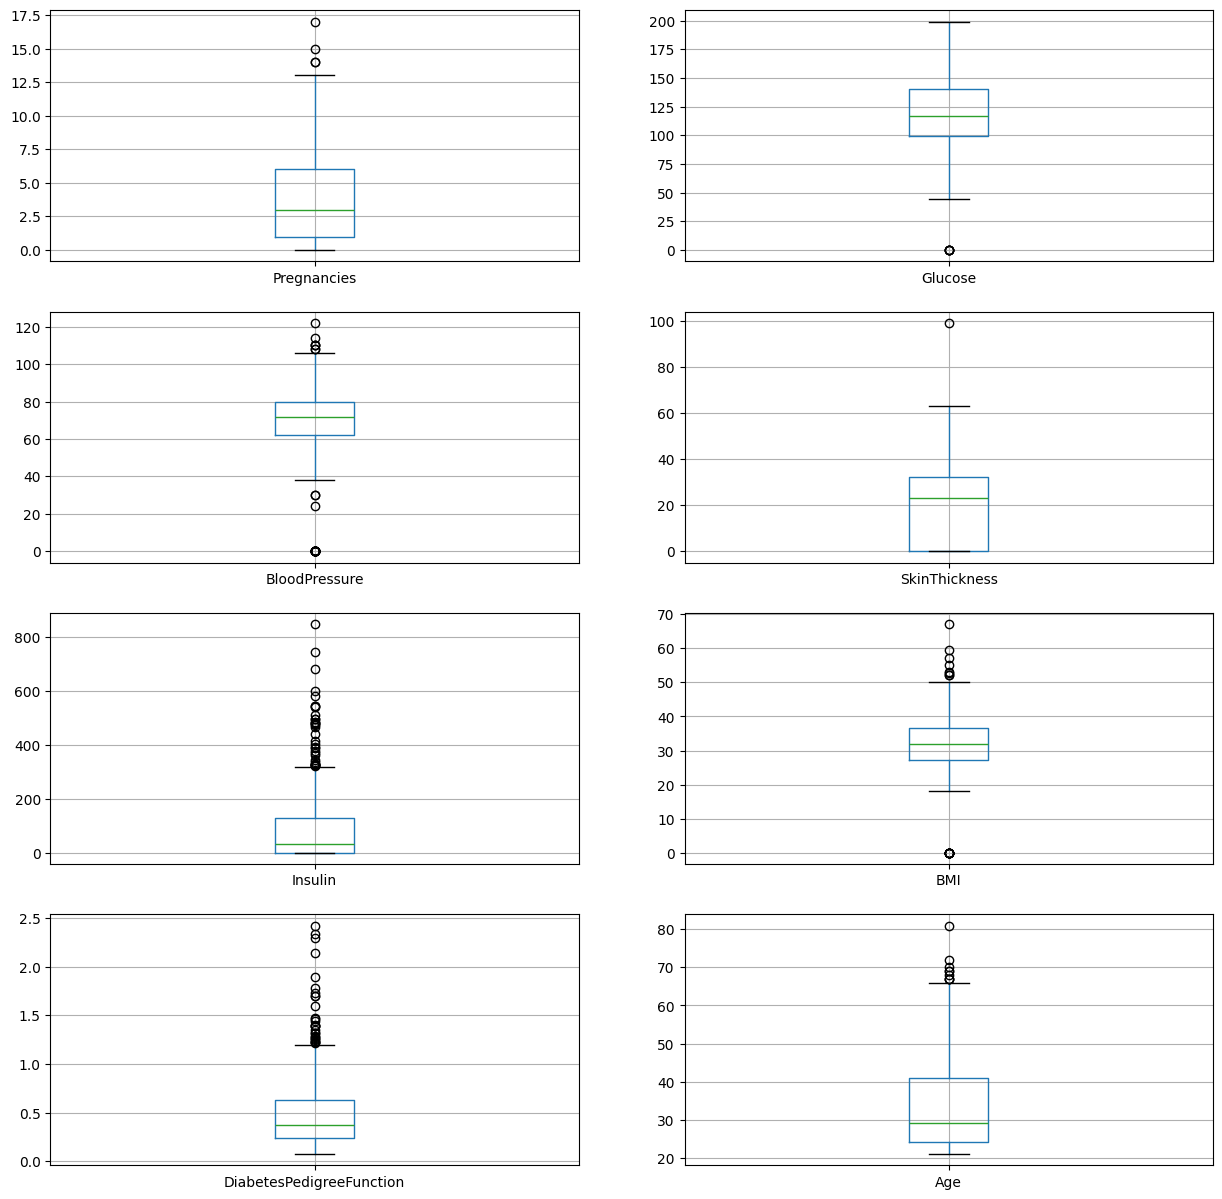

In [22]:
# Make a boxplot for each feature with its own y-axis

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i, feature in enumerate(features):
    if feature != 'Outcome':
        data.boxplot(column=feature, ax=axs[i//2, i%2])



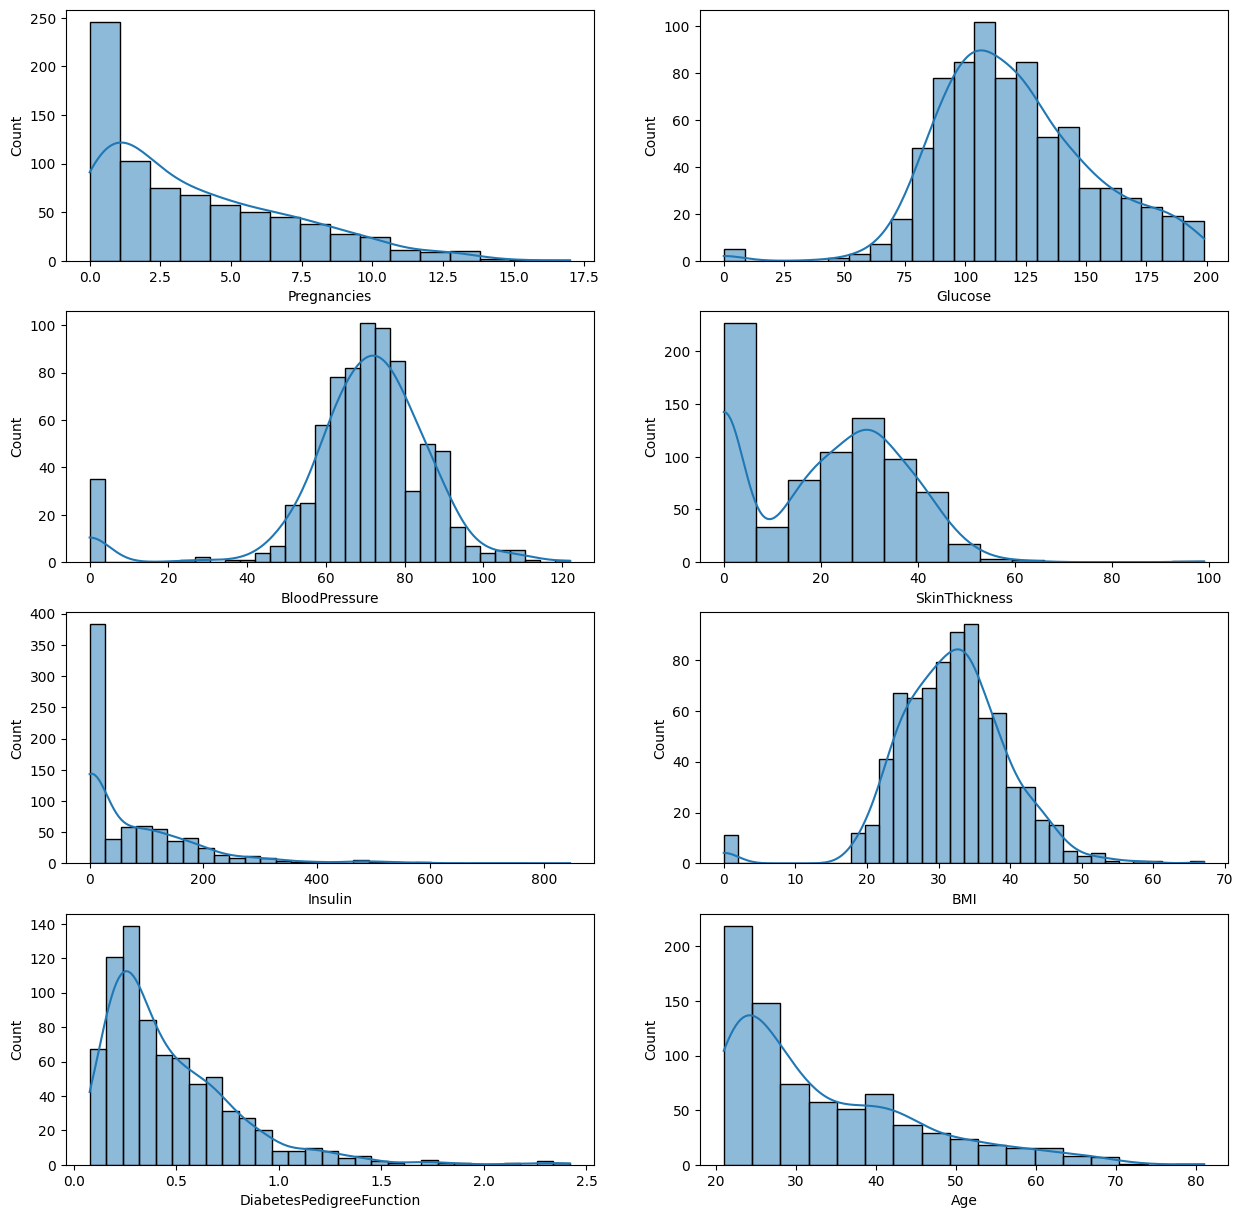

In [23]:
# Create normal/gaussian distribution for each feature
import seaborn as sns
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i, feature in enumerate(features):
    if feature != 'Outcome':
        sns.histplot(data[feature], kde=True, ax=axs[i//2, i%2])



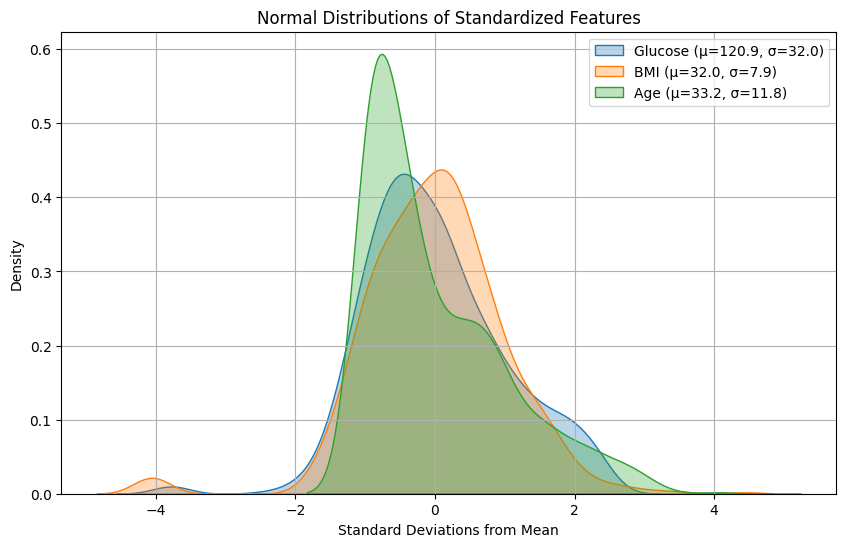

In [24]:

plt.figure(figsize=(10, 6))


features = ['Glucose', 'BMI', 'Age']


for feature in features:
    mean = data[feature].mean()
    std = data[feature].std()
    
    sns.kdeplot(data=(data[feature] - mean) / std, 
                label=f'{feature} (μ={mean:.1f}, σ={std:.1f})',
                fill=True, 
                alpha=0.3) 

plt.title('Normal Distributions of Standardized Features')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

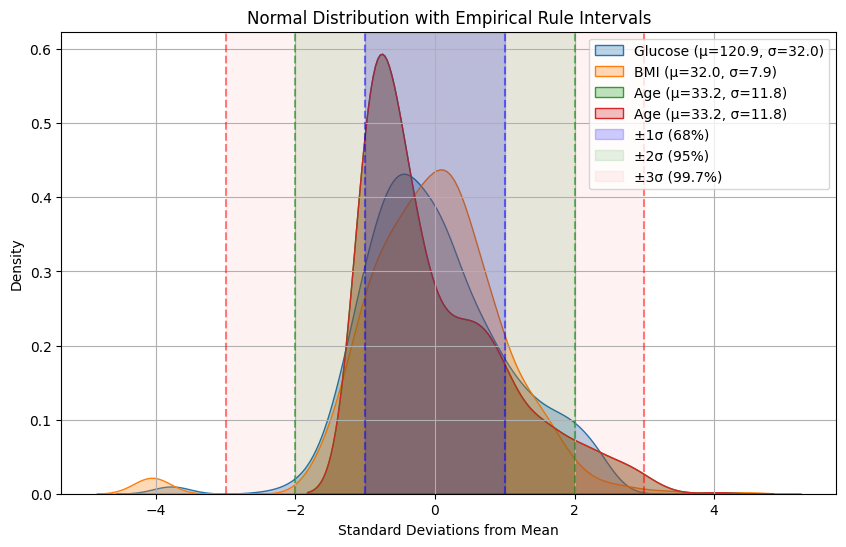

In [25]:
# Replace the last plotting code with:
plt.figure(figsize=(10, 6))

# Choose a single feature to demonstrate the rule
feature = ['Glucose', 'BMI', 'Age']

for feature in features:
    mean = data[feature].mean()
    std = data[feature].std()
    # Use seaborn's kdeplot with standardized data
    sns.kdeplot(data=(data[feature] - mean) / std, 
                label=f'{feature} (μ={mean:.1f}, σ={std:.1f})',
                fill=True, # Add light fill under the curves
                alpha=0.3) # Make the fill transparent
    


# Create standardized data
standardized_data = (data[feature] - mean) / std

# Create the density plot
sns.kdeplot(data=standardized_data, 
            label=f'{feature} (μ={mean:.1f}, σ={std:.1f})',
            fill=True,
            alpha=0.3)

# Add vertical lines and shaded regions for standard deviations
colors = ['blue', 'green', 'red']
alphas = [0.2, 0.1, 0.05]
sds = [1, 2, 3]
labels = ['68%', '95%', '99.7%']

for sd, color, alpha, label in zip(sds, colors, alphas, labels):
    plt.axvline(x=-sd, color=color, linestyle='--', alpha=0.5)
    plt.axvline(x=sd, color=color, linestyle='--', alpha=0.5)
    plt.axvspan(-sd, sd, alpha=alpha, color=color, label=f'±{sd}σ ({label})')

plt.title('Normal Distribution with Empirical Rule Intervals')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

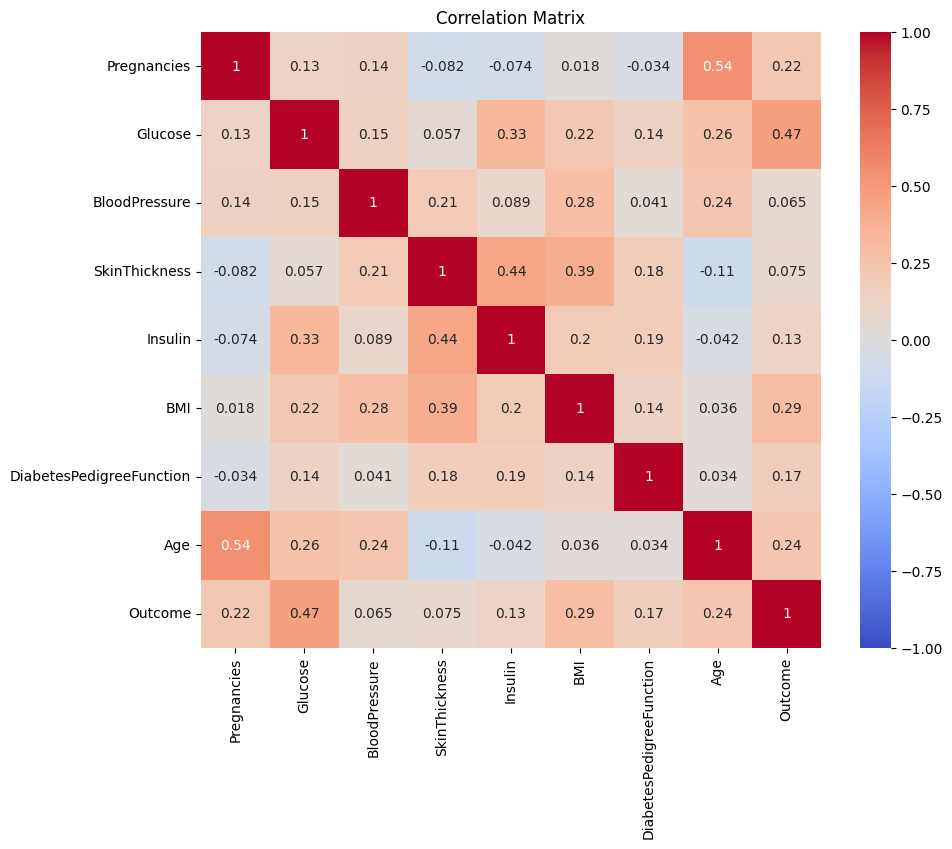

In [ ]:
corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

